**Kevin Raihan Yassin - Kompi Fire**

In [ ]:
import pandas as pd
import matplotlib as plt
pd.set_option('display.max_columns', None)

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Pandas Question

1. What is the minimum, median, max, and average salary for employee by Married Description and Gender.
Hints: use agg function<br>
Expected Output as below<br>
(5 Points)

In [ ]:
result = data.groupby(["MaritalDesc", "Sex"])["Salary"].agg(['min', 'median', 'max', 'mean'])
result.columns = ["Minimum Salary", "Median Salary", "Maximum Salary", "Average Salary"]
result

Minimum Salary  Median Salary  Maximum Salary  Average Salary
MaritalDesc Sex                                                               
Divorced    F             45069        59393.0           68182    57345.500000
            M             45115        63738.5          148999    72520.857143
Married     F             45433        62662.0          250000    69638.986111
            M             46120        63370.5          157000    70089.038462
Separated   F             52984        60627.0           66149    60658.888889
            M             64397        70468.0           74417    69760.666667
Single      F             45395        62068.0          220450    68988.266667
            M             46428        63055.5          178000    71340.048387
Widowed     F             45046        63303.5          107226    69719.750000
            M             52788        61359.0           67176    60670.500000

2. What is top-5 reason of termination?<br>
Expected Output as below<br>
(5 Points)

In [ ]:
termreason = data["TermReason"].value_counts().head(5)
termreason

N/A-StillEmployed    207
Another position      20
unhappy               14
more money            11
career change          9
Name: TermReason, dtype: int64

3. What is the highest number of employee by Recruitment Source that 'Exceeds' the Performance Score?
Hints: Use filter for Performance Score first. Don't forget to sort_values.<br>
Expected Output as below<br>
(5 Points)

In [ ]:
exceeds_data = data[data["PerformanceScore"] == "Exceeds"]
source_counts = exceeds_data["RecruitmentSource"].value_counts()
highest_source = source_counts.sort_values(ascending=False)
highest_source

Indeed                12
LinkedIn               9
Diversity Job Fair     6
Employee Referral      5
CareerBuilder          2
Google Search          2
Website                1
Name: RecruitmentSource, dtype: int64

4. How many managers in each department?
Hints: use nunique() as aggregation function.<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
managers_per_department = data.groupby("Department")["ManagerName"].nunique().reset_index()
managers_per_department.columns = ["Department", "Number of Managers"]
managers_per_department

,Department,Number of Managers
0,Admin Offices,3
1,Executive Office,1
2,IT/IS,6
3,Production,10
4,Sales,4
5,Software Engineering,3


5. What is Termination Ratio by Gender?.
Hints: use value_counts(normalize=True).<br>
Expected Output as below.<br>
(5 Points)

In [ ]:
termination_ratio_by_gender = data.groupby("Sex")["Termd"].value_counts(normalize=True).unstack(fill_value=0)
print(termination_ratio_by_gender)

Termd         0         1
Sex                      
F      0.659091  0.340909
M      0.674074  0.325926


# Create an EDA and Data Visualization Question

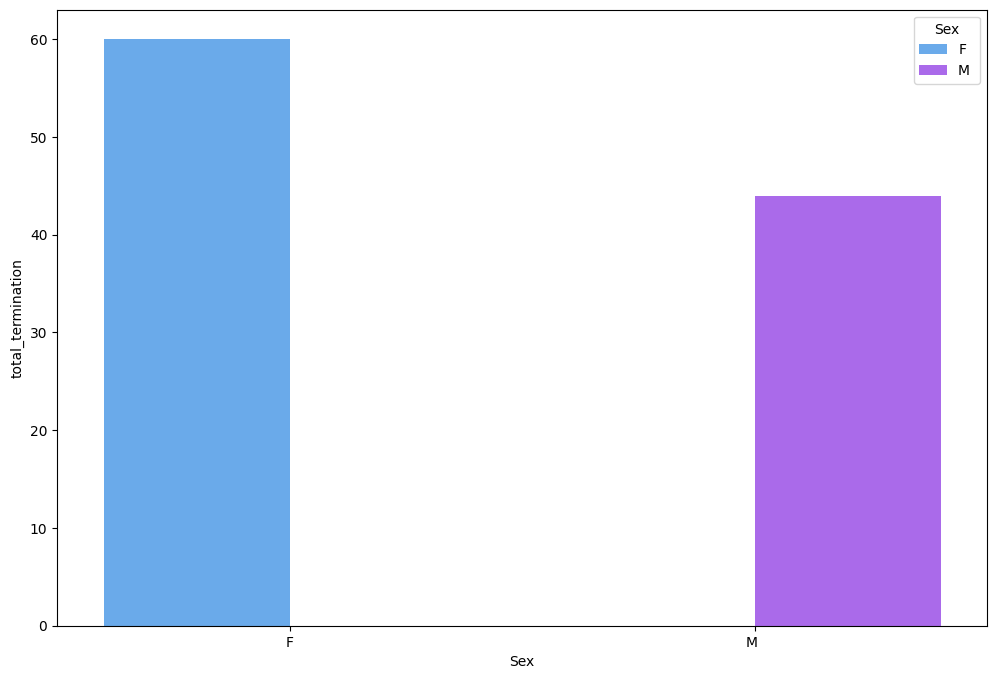

In [ ]:
#Sample Visualization, the example is not counted for the final score :p
#Create 5 visualization for better understanding on data
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

#Ratio termination by Gender

#Step1, get the data

term = data.groupby(by=['Sex'])\
                        .agg(total_termination=('Termd','sum')).reset_index()\

#Step2, Plot it
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='Sex', y='total_termination', hue='Sex', data=term, palette='cool')

6. Buatlah Scatter plot antara kolom "Salary" dengan "EngagementSurvey", beri warna berbeda sesuai dengan status di "Termd"<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

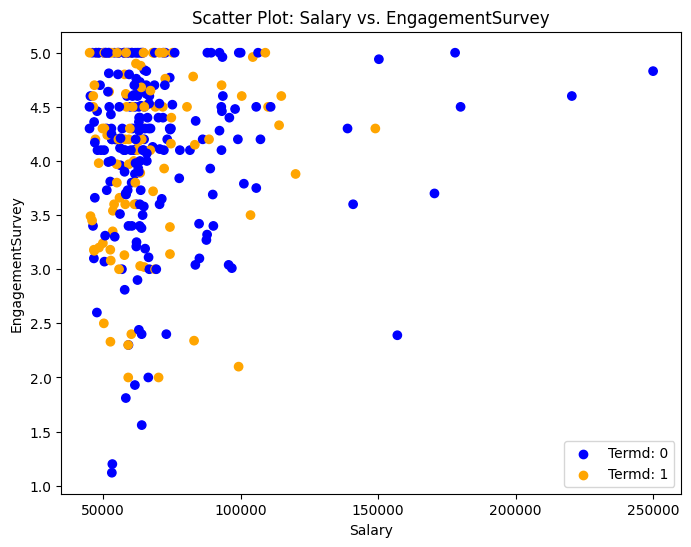

In [ ]:
colors = {0: 'blue', 1: 'orange'}
plt.figure(figsize=(8, 6))
plt.scatter(
    x=data["Salary"],
    y=data["EngagementSurvey"],
    c=data["Termd"].map(colors),  # Map Termd values to colors
    marker="o"
)

plt.xlabel("Salary")
plt.ylabel("EngagementSurvey")
plt.title("Scatter Plot: Salary vs. EngagementSurvey")

for termd, color in colors.items():
    plt.scatter([], [], c=color, label=f"Termd: {termd}")

plt.legend()
plt.show()

7. Buatlah visualisasi barchart untuk menghitung jumlah "termination of an employee's" berdasarkan department.<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

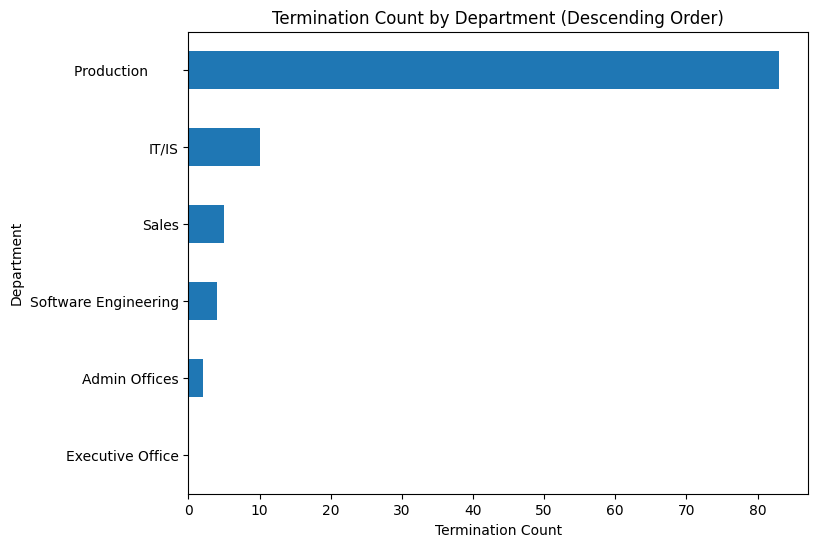

In [ ]:
termination_counts_by_department = data.groupby("Department")["Termd"].sum()
termination_counts_by_department = termination_counts_by_department.sort_values(ascending=True)


plt.figure(figsize=(8, 6))
termination_counts_by_department.plot(kind="barh")
plt.ylabel("Department")
plt.xlabel("Termination Count")
plt.title("Termination Count by Department (Descending Order)")
plt.show()

8. Buatlah visualisasi Pie Chart untuk melihat persentasi jumlah karyawan yang "terminated" berdasarkan kolom "Position".<br>
(5 points)<br>
*bentuk output di bawah hanya contoh*

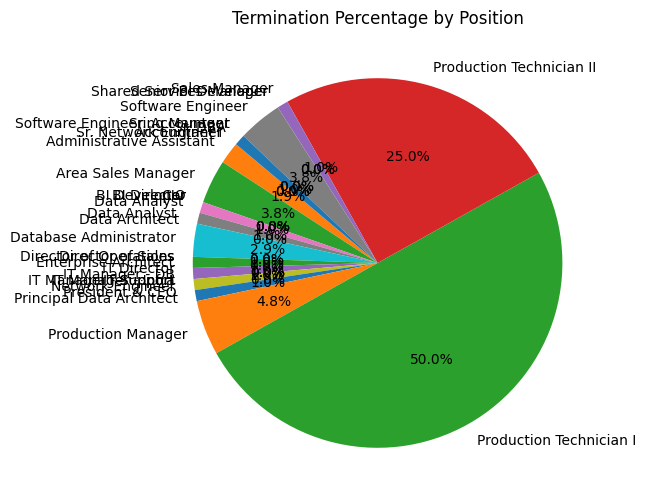

In [ ]:
termination_counts_by_position = data.groupby("Position")["Termd"].sum()
plt.figure(figsize=(8, 6))
plt.pie(termination_counts_by_position, labels=termination_counts_by_position.index, autopct='%1.1f%%', startangle=140)
plt.title("Termination Percentage by Position")
plt.show()

9. Buat Boxplot yang menggambarkan Salary berdasarkan Marital Desc, bedakan berdasarkan Termd
(5 points)

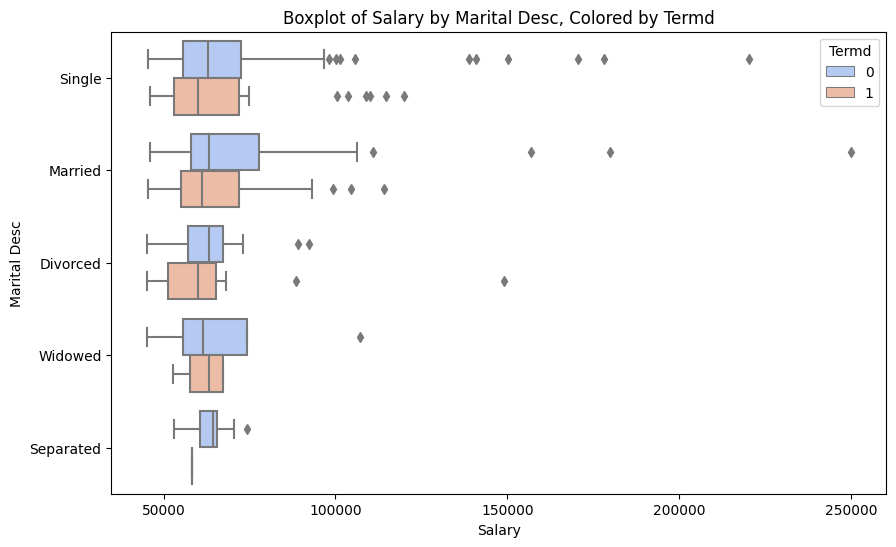

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Salary", y="MaritalDesc", data=data, hue="Termd", palette="coolwarm")
plt.xlabel("Salary")
plt.ylabel("Marital Desc")
plt.title("Boxplot of Salary by Marital Desc, Colored by Termd")
plt.show()

10. Tampilkan pairplot antara kolom 'Salary', 'EngagementSurvey', 'EmpSatisfaction','Absences'
beri kategori warna berdasarkan 'Termd'<br>
(5points)

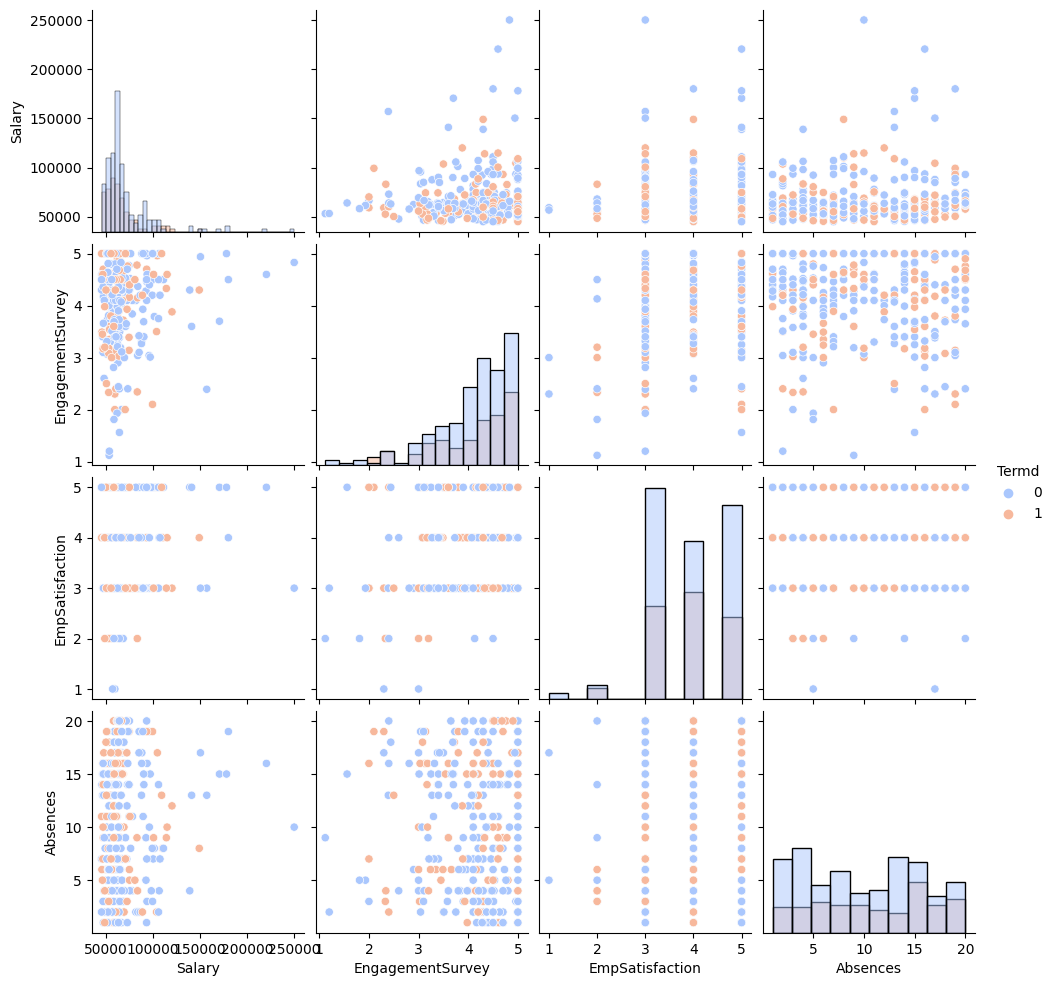

In [ ]:
columns_for_pairplot = ['Salary', 'EngagementSurvey', 'EmpSatisfaction', 'Absences', 'Termd']
sns.pairplot(data[columns_for_pairplot], hue='Termd', palette='coolwarm', diag_kind="hist")
plt.show()

# Create Machine Learning Model to Predict Termd and Question

In [ ]:
data2 = data.copy()

In [ ]:
data["DOB"] = pd.to_datetime(data["DOB"])
data["Age"] = 2022 - data["DOB"].dt.year
print(data[["DOB", "Age"]])

           DOB  Age
0   1983-07-10   39
1   1975-05-05   47
2   1988-09-19   34
3   1988-09-27   34
4   1989-09-08   33
..         ...  ...
306 1985-05-11   37
307 1982-05-04   40
308 1979-08-30   43
309 1979-02-24   43
310 1978-08-17   44

[311 rows x 2 columns]


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data["Scaled_Salary"] = scaler.fit_transform(data[["Salary"]])

print(data[["Salary", "Scaled_Salary"]])

     Salary  Scaled_Salary
0     62506       0.085190
1    104437       0.289777
2     64955       0.097139
3     64991       0.097315
4     50825       0.028197
..      ...            ...
306   65893       0.101716
307   48513       0.016916
308  220450       0.855821
309   89292       0.215883
310   45046       0.000000

[311 rows x 2 columns]


In [ ]:
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = data[column].astype('category')

# Show the DataFrame with updated data types
print(data.dtypes)

Employee_Name                       category
EmpID                                  int64
MarriedID                              int64
MaritalStatusID                        int64
GenderID                               int64
EmpStatusID                            int64
DeptID                                 int64
PerfScoreID                            int64
FromDiversityJobFairID                 int64
Salary                                 int64
Termd                                  int64
PositionID                             int64
Position                            category
State                               category
Zip                                    int64
DOB                           datetime64[ns]
Sex                                 category
MaritalDesc                         category
CitizenDesc                         category
HispanicLatino                      category
RaceDesc                            category
DateofHire                          category
DateofTerm

In [ ]:
#14. Ubahlah "RecruitmentSource" dengan menggunakan Label Encoder
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['RecruitmentSource_encoded'] = label_encoder.fit_transform(data['RecruitmentSource'])

#15. Ubahlah "PerformanceScore" dengan menggunakan Label Encoder
data['PerformanceScore_encoded'] = label_encoder.fit_transform(data['PerformanceScore'])


data[["RecruitmentSource", "RecruitmentSource_encoded", "PerformanceScore", "PerformanceScore_encoded"]].head()

,RecruitmentSource,RecruitmentSource_encoded,PerformanceScore,PerformanceScore_encoded
0,LinkedIn,5,Exceeds,0
1,Indeed,4,Fully Meets,1
2,LinkedIn,5,Fully Meets,1
3,Indeed,4,Fully Meets,1
4,Google Search,3,Fully Meets,1


In [ ]:
# Bukan soal tapi kayaknya kalo mau ngerjain machine learning nya hrs di-encode semuanya kak
cols_to_drop = ["Employee_Name", "LastPerformanceReview_Date", "DateofTermination", "DateofHire", "Position", "DOB", "RecruitmentSource", "PerformanceScore"]
data.drop(columns=cols_to_drop, inplace=True)

categorical_columns = [col for col in data.columns if data[col].dtype.name == "category"]

for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])

data

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,State,Zip,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,Age,Scaled_Salary,RecruitmentSource_encoded,PerformanceScore_encoded
0,10026,0,0,1,1,5,4,0,62506,0,19,10,1960,1,3,2,0,5,3,0,3,17,22.0,4.60,5,0,0,1,39,0.085190,5,0
1,10084,1,1,1,5,3,3,0,104437,1,27,10,2148,1,1,2,0,5,5,2,2,19,4.0,4.96,3,6,0,17,47,0.289777,4,1
2,10196,1,1,0,5,5,3,0,64955,1,20,10,1810,0,1,2,0,5,7,2,3,15,20.0,3.02,3,0,0,3,34,0.097139,5,1
3,10088,1,1,0,1,5,3,0,64991,0,19,10,1886,0,1,2,0,5,3,0,3,8,16.0,4.84,5,0,0,15,34,0.097315,4,1
4,10069,0,2,0,5,5,3,0,50825,1,19,10,2169,0,0,2,0,5,16,2,3,20,39.0,5.00,4,0,0,2,33,0.028197,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,10135,0,0,1,1,5,3,0,65893,0,20,10,1810,1,3,2,0,5,3,0,3,15,20.0,4.07,4,0,0,13,37,0.101716,5,1
307,10301,0,0,0,5,5,1,0,48513,1,19,10,2458,0,3,2,0,1,0,2,3,4,12.0,3.20,2,0,5,4,40,0.016916,3,3
308,10010,0,0,0,1,3,4,0,220450,0,6,10,2067,0,3,2,0,5,3,0,2,10,2.0,4.60,5,6,0,16,43,0.855821,2,0
309,10043,0,0,0,1,3,3,0,89292,0,9,10,2148,0,3,2,0,5,3,0,2,19,4.0,5.00,3,5,0,11,43,0.215883,2,1


In [ ]:
data.dropna(inplace=True)

In [ ]:
X = data.drop(columns=["Termd"])
y = data["Termd"]

In [ ]:
#17. Bagi data menjadi Train-Test sebesar 80:20
# (5 points)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_curve, roc_curve, precision_score, recall_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (242, 31)
y_train shape: (242,)
X_test shape: (61, 31)
y_test shape: (61,)


In [ ]:
#18. Lakukan pemodelan machine learning (metode klasifikasi bebas) untuk bisa memprediksi status "Termd". Lakukan evaluasi hasil dengan menampilkan
# score klasifikasi, precision dan recall.
# Gunakan model yang menurut kalian terbaik
# (5 points)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Classification Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

Classification Accuracy: 1.0
Precision: 1.0
Recall: 1.0


[link text](https://)# Insight (Answering the Question)

19.	Is there any relationship between who a person works for (their manager) and their performance score? (5 points)<br>
20.	What are our best recruiting sources if we want to ensure a low ratio of termination? (5 points)<br>

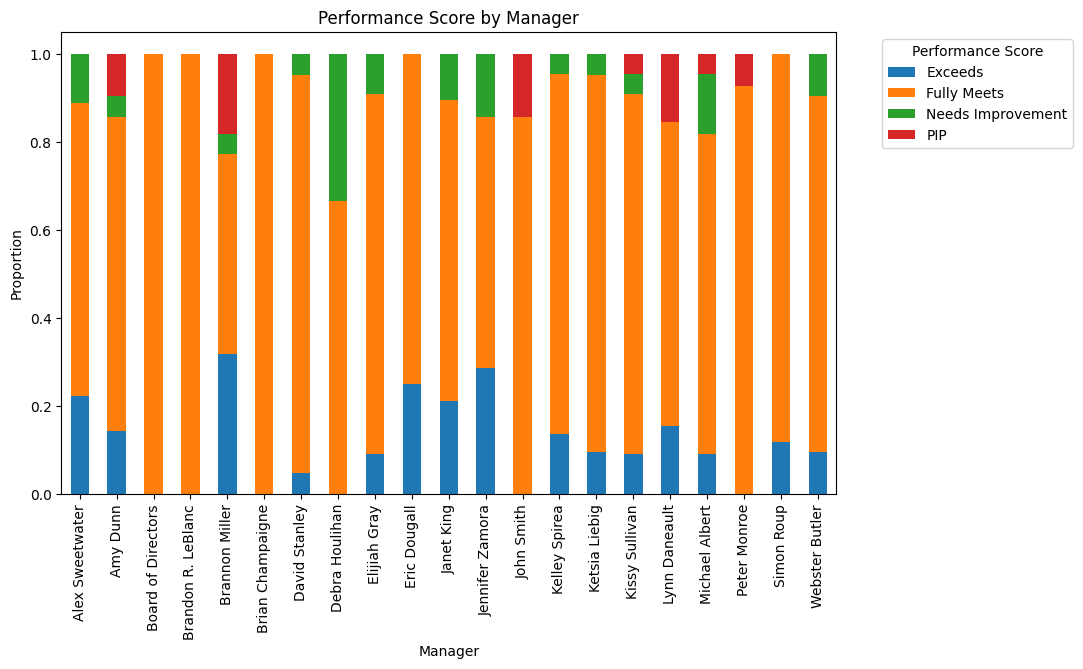

In [ ]:
manager_performance = data2.groupby("ManagerName")["PerformanceScore"].value_counts(normalize=True).unstack().fillna(0)

manager_performance.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Performance Score by Manager")
plt.xlabel("Manager")
plt.ylabel("Proportion")
plt.legend(title="Performance Score", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

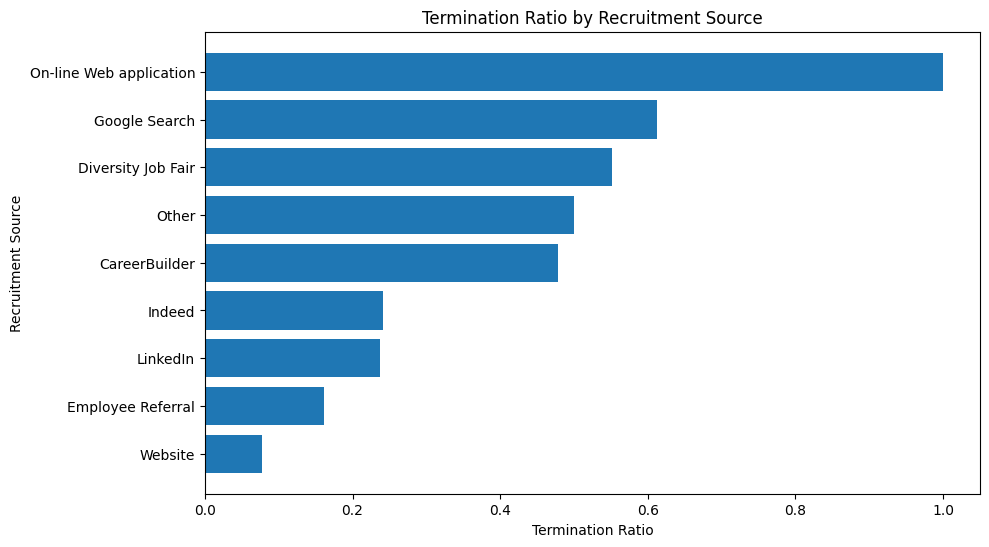

In [ ]:
termination_ratio = data2.groupby("RecruitmentSource")["Termd"].mean().reset_index()
termination_ratio_sorted = termination_ratio.sort_values(by="Termd")

plt.figure(figsize=(10, 6))
plt.barh(termination_ratio_sorted["RecruitmentSource"], termination_ratio_sorted["Termd"])
plt.title("Termination Ratio by Recruitment Source")
plt.xlabel("Termination Ratio")
plt.ylabel("Recruitment Source")

plt.show()